In [84]:
!echo "export JAVA_HOME=$(/usr/libexec/java_home)" >> ~/.bash_profile

In [85]:
!source ~/.bash_profile

In [86]:
!javac

Usage: javac <options> <source files>
where possible options include:
  @<filename>                  Read options and filenames from file
  -Akey[=value]                Options to pass to annotation processors
  --add-modules <module>(,<module>)*
        Root modules to resolve in addition to the initial modules, or all modules
        on the module path if <module> is ALL-MODULE-PATH.
  --boot-class-path <path>, -bootclasspath <path>
        Override location of bootstrap class files
  --class-path <path>, -classpath <path>, -cp <path>
        Specify where to find user class files and annotation processors
  -d <directory>               Specify where to place generated class files
  -deprecation
        Output source locations where deprecated APIs are used
  --enable-preview
        Enable preview language features. To be used in conjunction with either -source or --release.
  -encoding <encoding>         Specify character encoding used by source files
  -endorseddirs <dirs>        

In [87]:
!pip install little_mallet_wrapper

In [88]:
!pip install seaborn

In [89]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

In [90]:
!pip install little_mallet_wrapper
!pip install seaborn

In [91]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

In [92]:
#Replace filename/path
tweets_df = pd.read_csv('Desktop/Tampon_tax_Twitter/tampontax_file.csv', delimiter=",", encoding='utf-8')

In [93]:
tweets_df.head()

,id,created_at,text,attachments.media,author.id,author.created_at,author.username,author.name,author.description,author.entities.url.urls,...,referenced_tweets,reply_settings,source,withheld.scope,withheld.copyright,withheld.country_codes,type,__twarc.retrieved_at,__twarc.url,__twarc.version
0,1.410000e+18,2021-07-01T15:09:41.000Z,“I think that there was a sense that we can do better than that now. Our tax policy can be bette...,NaN,2.399930e+09,2014-03-20T14:11:42.000Z,VTWomen,VT Commission Women,Vermont's independent public agency dedicated to advancing rights and opportunities for women,"[{""start"": 0, ""end"": 22, ""url"": ""http://t.co/yJdTiNAwtt"", ""expanded_url"": ""http://women.vermont....",...,NaN,everyone,Twitter for iPhone,NaN,NaN,NaN,NaN,2021-09-30T15:01:15+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferen...,2.6.0
1,1.410000e+18,2021-06-30T21:36:03.000Z,"Starting on Thursday, buying a box of tampons or pads in Vermont will be a slightly less costly ...",[{}],6.597892e+06,2007-06-05T16:20:18.000Z,sevendaysvt,Seven Days,"We're the independent Vermont newspaper and website covering news, politics, food, arts and cult...","[{""start"": 0, ""end"": 22, ""url"": ""http://t.co/olSVKPIXUa"", ""expanded_url"": ""http://www.sevendaysv...",...,NaN,everyone,Buffer,NaN,NaN,NaN,quoted,2021-09-30T15:01:15+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferen...,2.6.0
2,1.410000e+18,2021-07-01T02:02:43.000Z,VT you glorious state!!\n\n#periodtax #tampontax https://t.co/aVTOkUYI4g,NaN,2.206095e+07,2009-02-26T20:58:25.000Z,KatieWellsMD,"Katie Wells MD, MPH","Dir of International EM, Asst. Professor @UVMEmergencyMed| Emergency Systems|GH Policy|Gender Eq...",NaN,...,"[{""type"": ""quoted"", ""id"": ""1410351451755384842""}]",everyone,Twitter for iPhone,NaN,NaN,NaN,NaN,2021-09-30T15:01:15+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferen...,2.6.0
3,1.400000e+18,2021-05-25T21:27:23.000Z,Thank you @RachelMGibsonNE for the menstrual supplies donation.. . this is such an important nee...,"[{""url"": ""https://pbs.twimg.com/media/E2Q3818XIAE5eyZ.jpg"", ""height"": 1222, ""width"": 1080, ""type...",9.573132e+07,2009-12-09T21:02:14.000Z,CMaxwellOstdiek,CindyMaxwell-Ostdiek,NaN,NaN,...,NaN,everyone,Twitter for Android,NaN,NaN,NaN,NaN,2021-09-30T15:01:15+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferen...,2.6.0
4,1.370000e+18,2021-03-08T14:00:15.000Z,Happy #InternationalWomensDay - This year's theme is #ChooseToChallenge - so choosing to challen...,[{}],1.230000e+18,2020-02-24T02:28:00.000Z,AsGoesWisconsin,AsGoesWisconsin,"Moving Wisconsin Forward, one joke at a time.","[{""start"": 0, ""end"": 23, ""url"": ""https://t.co/GO7ueF5e96"", ""expanded_url"": ""https://asgoeswiscon...",...,NaN,everyone,Twitter Web App,NaN,NaN,NaN,quoted,2021-09-30T15:01:15+00:00,https://api.twitter.com/2/tweets/search/all?expansions=author_id%2Cin_reply_to_user_id%2Creferen...,2.6.0


In [94]:
tweets_df['text'] = tweets_df['text'].astype(str)

In [95]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in tweets_df['text']]

In [96]:
original_tweets = [title for title in tweets_df['text']]

In [97]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 929
Mean Number of Words per Document: 13.0
Vocabulary Size: 3587


In [98]:
num_topics = 35

In [99]:
training_data = training_data

In [100]:
#Change to your desired output directory
output_directory_path = 'Desktop/topic-model-output/Twitter/Tampon_tax'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [101]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                                                     output_directory_path,
                                                                     num_topics,
                                                                     training_data)

Importing data...
Complete
Training topic model...
Complete


([['period',
   'tampontax',
   'https',
   'products',
   'rally',
   'nationalperiodday',
   'end',
   'accessible',
   'poverty',
   'issue',
   'heard',
   'make',
   'first',
   'tomorrow',
   'making',
   'austin',
   'change',
   'access',
   'texas',
   'demand'],
  ['women',
   'sen',
   'good',
   'pinktax',
   'girls',
   'michigan',
   'day',
   'bras',
   'fellow',
   'soon',
   'genderequity',
   'stand',
   'winniebrinks',
   'https',
   'gqezuc',
   'co/wlh',
   'ovaries',
   'iabaoh',
   'pqqcymr',
   'weighing'],
  ['tampontax',
   'msjwilly',
   'thedailyshow',
   'msmagazine',
   'gloriasteinem',
   'msfoundation',
   'lafisch',
   'stephhallett',
   'pvnejiw',
   'co/ci',
   'voting',
   'call',
   'wcw',
   'trevornoah',
   'cosmopolitan',
   'calling',
   'womensmarch',
   'may',
   'https',
   'myfeminismis'],
  ['periodequity',
   'mylolatweet',
   'taxfreeperiod',
   'tampontax',
   'joins',
   'ballot',
   'nevada',
   'jweisswolf',
   'got',
   'strategy',
 

In [102]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['period', 'tampontax', 'https', 'products', 'rally', 'nationalperiodday', 'end', 'accessible', 'poverty', 'issue', 'heard', 'make', 'first', 'tomorrow', 'making', 'austin', 'change', 'access', 'texas', 'demand']

✨Topic 1✨

['women', 'sen', 'good', 'pinktax', 'girls', 'michigan', 'day', 'bras', 'fellow', 'soon', 'genderequity', 'stand', 'winniebrinks', 'https', 'gqezuc', 'co/wlh', 'ovaries', 'iabaoh', 'pqqcymr', 'weighing']

✨Topic 2✨

['tampontax', 'msjwilly', 'thedailyshow', 'msmagazine', 'gloriasteinem', 'msfoundation', 'lafisch', 'stephhallett', 'pvnejiw', 'co/ci', 'voting', 'call', 'wcw', 'trevornoah', 'cosmopolitan', 'calling', 'womensmarch', 'may', 'https', 'myfeminismis']

✨Topic 3✨

['periodequity', 'mylolatweet', 'taxfreeperiod', 'tampontax', 'joins', 'ballot', 'nevada', 'jweisswolf', 'got', 'strategy', 'talk', 'yesterday', 'state', 'slutwalk', 'darealamberrose', 'co/b', 'officially', 'serenawilliams', 'marieclaire', 'joining']

✨Topic 4✨

['men', 'utah', 'male', 

In [103]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [104]:
tweet_dict = dict(zip(training_data, original_tampontax_tweets))

In [105]:
def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

In [106]:
display_top_tweets_per_topic(topic_number=1, number_of_documents=5)

✨Topic 1✨

['women', 'sen', 'good', 'pinktax', 'girls', 'michigan', 'day', 'bras', 'fellow', 'soon', 'genderequity', 'stand', 'winniebrinks', 'https', 'gqezuc', 'co/wlh', 'ovaries', 'iabaoh', 'pqqcymr', 'weighing']

0.7753 One of my favorite topics the #pinktax discussed by @tashorama of @BoxedWholesale I wrote about the phenomenon of women paying more for #CPG products @HuffPost https://t.co/pVnekDPkPi #womenshealth #hccosts #genderequity #tampontax #SelfcareSummit @GMDCorg #SS19 #FinancialHealth https://t.co/sco6j9cTYM

0.7216 Kudos to Michigan State Sen. @DavidKnezek for joining the fight! #NoTaxOnTampons https://t.co/SidfBfaNc5

0.6646 Thank you to @WinnieBrinks and Sandy Swanson, Past President of the Kentwood Women’s Club, for discussing the Michigan Tampon Tax. Look for the podcast to drop soon! \n\n#pinktax #genderequity #taxation #tampontax #socialjustice #women https://t.co/wiWT7ERjE9

0.5596 It’s an especially good day for the women and girls and youngest children of Califor

In [126]:
display_top_tweets_per_topic(topic_number=8, number_of_documents=5)

✨Topic 8✨

['one', 'political', 'across', 'happening', 'thank', 'agrenell', 'velasquez', 'country', 'news', 'money', 'winner', 'much', 'co/h', 'really', 'co/yx', 'govt', 'otherwise', 'impact', 'outside', 'big']

0.7463 Underwhelming news: The gender wage gap shrunk one cent. Don't spend it all in one place. #EqualPay https://t.co/nJev2yUfC3

0.4944 This is crazy! A #tampontax? Really? https://t.co/CpuXNHHEQX

0.4592 @agrenell @J__Velasquez yes much happening around the country &amp; in NY on #tampontax. Pls contact me! And thank you @JulissaFerreras!!

0.4221 Thank you @RachelMGibsonNE for the menstrual supplies donation.. . this is such an important need and @senatorblood will be distributing the products across the state! Plz find more info about the drive at:\n\nhttps://t.co/1qqU6Haoe0\n\n#neleg #PeriodPovertyAwarenessWeek #tampontax https://t.co/D43XOtz38L

0.4197 @MelissaSantos1 @mashdots Hooray! Thank you!\n\nBirthday wish: remove this damn #PinkTax for the millions of women acro

In [127]:
display_top_tweets_per_topic(topic_number=7, number_of_documents=5)

✨Topic 7✨

['legislation', 'support', 'introduced', 'bipartisan', 'brigidekelly', 'also', 'florida', 'signed', 'year', 'behind', 'nirajantani', 'huffpostwomen', 'everywhere', 'victory', 'huge', 'flgovscott', 'legislative', 'reps', 'policies', 'family']

0.7575 Things you don't normally see: Glamour Magazine with a shout-out to @FLGovScott bc he signed legislation this year that eliminated the state's tampon tax. Called it a "huge, bipartisan victory in the confusing political landscape of Florida."  https://t.co/5n9QWmcmFQ

0.6632 @fineout @FLGovScott And last year @GovRauner in IL also signed a #tampontax bill ... the issue has growing bipartisan support, for sure.

0.619 #tampontax has been introduced to this legislative term 🤗🤗🤗 https://t.co/ASQvLQ2Ysq

0.6118 https://t.co/ZU6DkILGjp LoL Those Crazy Floridians..Women Everywhere in Florida Celebrate.. No More #Florida  #TamponTax

0.5694 In the broader fight for #menstrualequity and #periodpolicy the #tampontax is only just the start

In [128]:
display_top_tweets_per_topic(topic_number=14, number_of_documents=5)

✨Topic 14✨

['https', 'tampontax', 'petition', 'cosmopolitan', 'share', 'co/ea', 'fxdiznn', 'please', 'sign', 'pls', 'tamponsforall', 'change', 'end', 'msmagazine', 'help', 'thanks', 'joannacoles', 'word', 'spread', 'danismcnally']

0.9283 https://t.co/eA1fXdizNN @msfoundation pls urge followers to sign the @Cosmopolitan @Change petition to end the #tampontax

0.9283 https://t.co/eA1fXdizNN @lenadunham @lennyletter please share the @Cosmopolitan petition to end the #tampontax @GloriaSteinem @JoannaColes

0.9283 https://t.co/eA1fXd0Ypd @PennyRed please help share our petition to end the #tampontax in the US! @Cosmopolitan @DaniSMcNally

0.9283 https://t.co/eA1fXd0Ypd @lolololori please share @Cosmopolitan #tampontax petition! @DaniSMcNally @JoannaColes #tamponsforall

0.9229 https://t.co/1AJQOEHhIn @lennyletter @lenadunham please share the @Cosmopolitan petition to axe the #tampontax @JoannaColes @DaniSMcNally



In [107]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):

        probability = f"✨✨✨\n\n**{probability}**"
        original_text = tweet_dict[document]
        original_text_lowered = original_text.lower()
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text_lowered:
                original_text = re.sub(f"\\b{word}\\b", f"**{word.upper()}**", original_text, flags=re.I)

        display(Markdown(probability)), display(Markdown(original_text))
    return

In [108]:
display_bolded_topic_words_in_context(topic_number=1, number_of_documents=4)

✨Topic 1✨

['women', 'sen', 'good', 'pinktax', 'girls', 'michigan', 'day', 'bras', 'fellow', 'soon', 'genderequity', 'stand', 'winniebrinks', 'https', 'gqezuc', 'co/wlh', 'ovaries', 'iabaoh', 'pqqcymr', 'weighing']



✨✨✨

**0.7752853721646571**

One of my favorite topics the #**PINKTAX** discussed by @tashorama of @BoxedWholesale I wrote about the phenomenon of **WOMEN** paying more for #CPG products @HuffPost **HTTPS**://t.co/pVnekDPkPi #womenshealth #hccosts #**GENDEREQUITY** #tampontax #SelfcareSummit @GMDCorg #SS19 #FinancialHealth **HTTPS**://t.co/sco6j9cTYM

✨✨✨

**0.7216397225036296**

Kudos to **MICHIGAN** State **SEN**. @DavidKnezek for joining the fight! #NoTaxOnTampons **HTTPS**://t.co/SidfBfaNc5

✨✨✨

**0.6645817777160878**

Thank you to @**WINNIEBRINKS** and Sandy Swanson, Past President of the Kentwood **WOMEN**’s Club, for discussing the **MICHIGAN** Tampon Tax. Look for the podcast to drop **SOON**! \n\n#**PINKTAX** #**GENDEREQUITY** #taxation #tampontax #socialjustice #**WOMEN** **HTTPS**://t.co/wiWT7ERjE9

✨✨✨

**0.5596336814399828**

It’s an especially **GOOD** **DAY** for the **WOMEN** and **GIRLS** and youngest children of California #**PINKTAX** #TamponTax cc: @NWPCCA @NWPCLAWestside **HTTPS**://t.co/XNMx6qPj4L

In [109]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [110]:
tweets_df['topic_distributions'] = pd.Series(topic_distributions)

In [111]:
topic_distributions_df = tweets_df['topic_distributions'].apply(pd.Series)

In [112]:
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]

In [114]:
tweets_df = pd.concat([tweets_df, topic_distributions_df], axis=1)

In [115]:
tweets_df.columns

Index(['id', 'created_at', 'text', 'attachments.media', 'author.id',
       'author.created_at', 'author.username', 'author.name',
       'author.description', 'author.entities.url.urls',
       ...
       'nightlyshow larrywilmore michaelpielocik tampontuesday',
       'tax https sales products', 'tampontax https love talk',
       'tamps eracoalition report especially', 'think piece death better',
       'new york action lawsuit', 'via women change stop',
       'seibert margo carejaneangell racket',
       'tampontax bills https jenniferboysko', 'get https laura sharing'],
      dtype='object', length=110)

In [116]:
tweets_df["created_at"] = tweets_df["created_at"].astype('datetime64[ns]') 
tweets_df["created_at"] = tweets_df.created_at.dt.to_pydatetime()

In [117]:
tweets_df.rename(columns={'created_at': 'date','public_metrics.retweet_count': 'retweets', 
                          'author.username': 'username', 
                          'author.name': 'name',
                          'author.verified': 'verified', 
                          'public_metrics.like_count': 'likes', 
                          'public_metrics.quote_count': 'quotes', 
                          'public_metrics.reply_count': 'replies',
                           'author.description': 'user_bio'},
                            inplace=True)

In [118]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

In [119]:
tweets_df['year'] = pd.to_datetime(tweets_df['date'].dt.year, format='%Y')

In [120]:
tweets_df['year-month'] = tweets_df['date'].dt.to_period('M')

In [121]:
tweets_df['Date (by month)'] = [month.to_timestamp() for month in tweets_df['year-month']]

In [122]:
tweets_df = tweets_df.set_index('Date (by month)')

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nSupport Happy Effort Gothamgazette'}, xlabel='Date (by month)'>

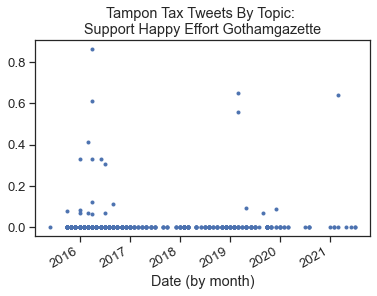

In [123]:
#change title
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

tweets_df[topic_label].plot(style='.', title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}')

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nOne Political Across Happening'}, xlabel='Date (by month)'>

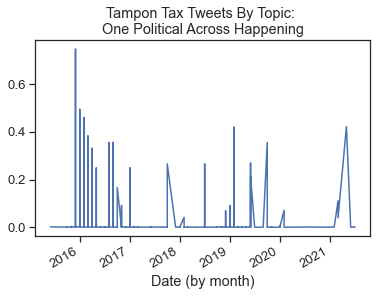

In [135]:
#change title

topic_number = 8

topic_label = " ".join(topics[topic_number][:4])

tweets_df[topic_label].plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}')

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nOne Political Across Happening'}, xlabel='Date (by month)'>

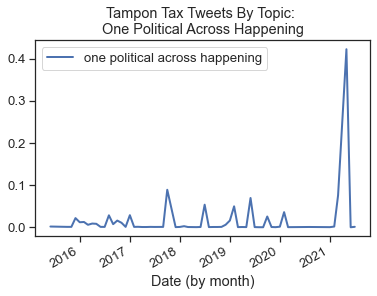

In [136]:
#change title

topic_number = 8

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nHttps Tampontax Petition Cosmopolitan'}, xlabel='Date (by month)'>

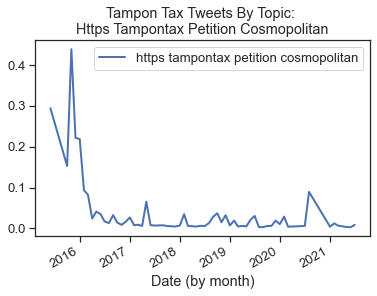

In [132]:
#change title

topic_number = 14

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nPeriod Tampontax Https Products'}, xlabel='Date (by month)'>

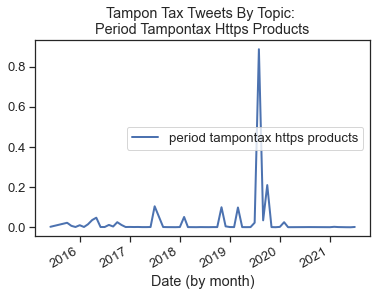

In [133]:
#change title & topic number

topic_number = 0

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)

In [134]:
display_top_tweets_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['period', 'tampontax', 'https', 'products', 'rally', 'nationalperiodday', 'end', 'accessible', 'poverty', 'issue', 'heard', 'make', 'first', 'tomorrow', 'making', 'austin', 'change', 'access', 'texas', 'demand']

0.9602 PSA: DEEDS at UT Austin will be having a pre-meetup for the Texas National Period Rally in Austin. \n💜\nJoin us as we elevate the issue of period poverty and demand real change to make period products more accessible for all and ending the #TamponTax!\n💜 https://t.co/6Fj7pXQg1P

0.8864 RSVP to meet #MenstrualFlux &amp; @periodmovement in 2 months in #ATX!! 10/19 wear red, bring all the signs as we rally for #NationalPeriodDay @atxcapital! We aim to elevate the issue of #PeriodPoverty by demanding #MenstrualProducts become readily accessible &amp; to end the #TamponTax https://t.co/joFQSxgHGH

0.8413 Tomorrow join us at Republic Square in Austin from 2:30-4:30! Our voice will be heard and we will end the #TamponTax in Texas https://t.co/6EhtmDVZsB

0.8413 👏👏👏

<AxesSubplot:title={'center':'Tampon Tax Tweets By Topic: \nSupport Happy Effort Gothamgazette'}, xlabel='Date (by month)'>

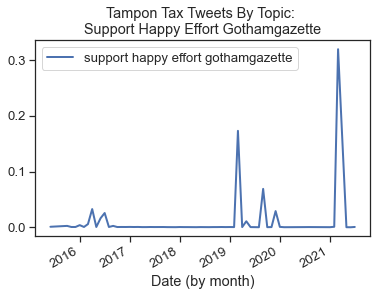

In [137]:
#change title & topic number

topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

tweets_df.groupby(tweets_df.index)[[topic_label]].mean().plot(title=f'Tampon Tax Tweets By Topic: \n{topic_label.title()}', linewidth=2)